In [43]:
#importing Libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


In [6]:
#reading data set

zomato_original = pd.read_csv('zomato.csv')

zomato_original.head(1)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari


In [9]:
#Deleting unnecessary columns
zomato = zomato_original.drop(['url','dish_liked','phone'],axis = 1)
zomato.head(1)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari


In [ ]:
#No of duplicatees
zomato.duplicated().sum()

In [15]:
#Removing duplicates
zomato.drop_duplicates(inplace =True)

In [22]:
#Count of the NaN values from the dataset
zomato.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [19]:
#removing  the NaN values from the dataset
zomato.dropna(how='any',inplace=True)

In [21]:
#checking the NaN values from the dataset
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
address                        43499 non-null object
name                           43499 non-null object
online_order                   43499 non-null object
book_table                     43499 non-null object
rate                           43499 non-null object
votes                          43499 non-null int64
location                       43499 non-null object
rest_type                      43499 non-null object
cuisines                       43499 non-null object
approx_cost(for two people)    43499 non-null object
reviews_list                   43499 non-null object
menu_item                      43499 non-null object
listed_in(type)                43499 non-null object
listed_in(city)                43499 non-null object
dtypes: int64(1), object(13)
memory usage: 5.0+ MB


In [25]:
#Changing the Columns Names

zomato = zomato.rename(columns ={'approx_cost(for two people)' :'cost','listed_in(type)':'type','listed_in(city)':'city'})
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [27]:
#Some Transformations converting cost type to float
zomato['cost']=zomato['cost'].astype(str)
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.'))
zomato['cost'] = zomato['cost'].astype(float)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
address         43499 non-null object
name            43499 non-null object
online_order    43499 non-null object
book_table      43499 non-null object
rate            43499 non-null object
votes           43499 non-null int64
location        43499 non-null object
rest_type       43499 non-null object
cuisines        43499 non-null object
cost            43499 non-null float64
reviews_list    43499 non-null object
menu_item       43499 non-null object
type            43499 non-null object
city            43499 non-null object
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [33]:
#Removing '/5' from Rates
zomato['rate'].unique()
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')
zomato['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [39]:
# Adjust the column names
zomato.online_order.replace(('Yes','No'),(True,False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True,False),inplace=True)
zomato.head(10)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,True,False,3.8,286,Basavanagudi,Casual Dining,North Indian,600.0,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,False,False,3.6,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800.0,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,True,True,4.6,2556,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600.0,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,True,False,4.0,324,Banashankari,Cafe,"Cafe, Italian, Continental",700.0,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,True,False,4.2,504,Banashankari,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",550.0,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


In [41]:
#encode the input Variables
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate', 'cost', 'votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato

zomato_en = Encode(zomato.copy())
zomato_en

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41232,3137,2705,1,1,3.7,34,25,28,204,800.0,4028,0,6,29
41233,8791,1718,1,1,2.5,81,25,28,761,800.0,21082,0,6,29
41234,8725,6561,1,1,3.6,27,25,17,240,1.5,20956,0,6,29
41235,8786,6598,1,0,4.3,236,56,17,237,2.5,21054,0,6,29


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

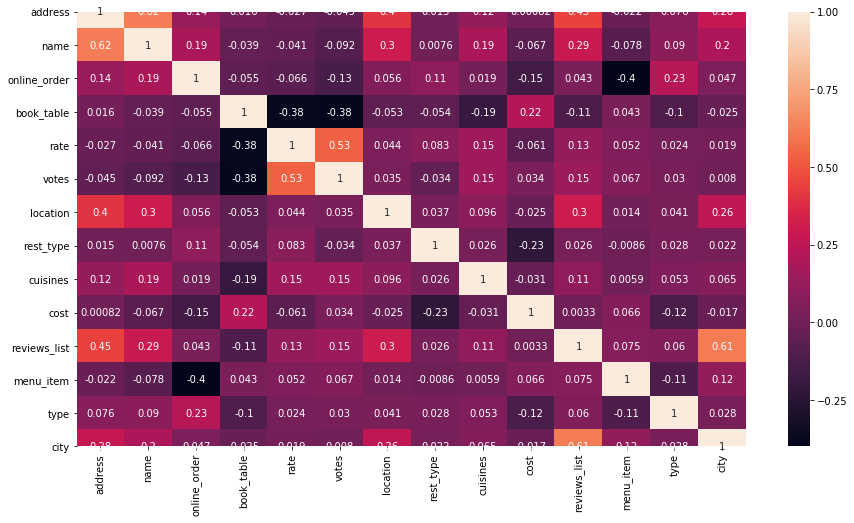

In [44]:
#Get Correlation between different variables
corr = zomato_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
zomato_en.columns

Text(0.5, 1.0, 'Restaurants delivering online or Not')

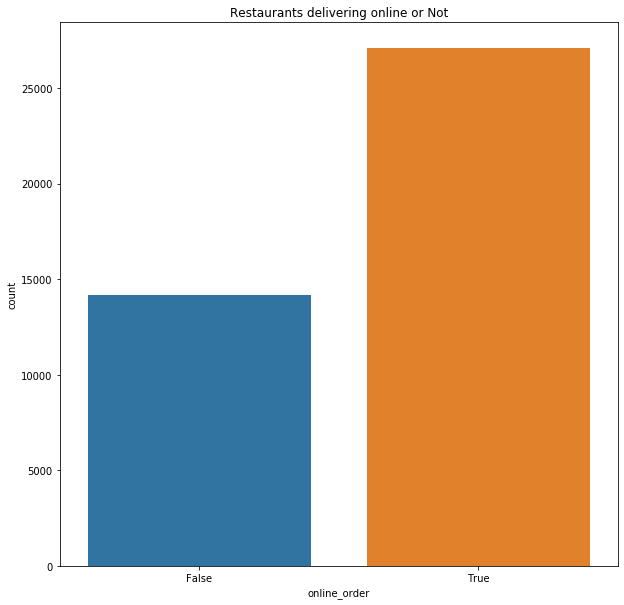

In [49]:
#Restaurants delivering Online or not
sns.countplot(zomato['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

Text(0.5, 1.0, 'Restaurants allowing table booking or not')

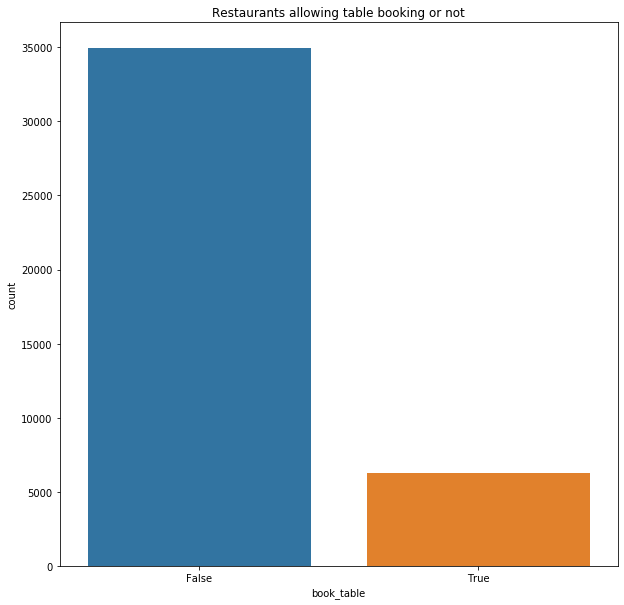

In [54]:
#Restaurants allowing table booking or not
sns.countplot(zomato['book_table'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants allowing table booking or not')

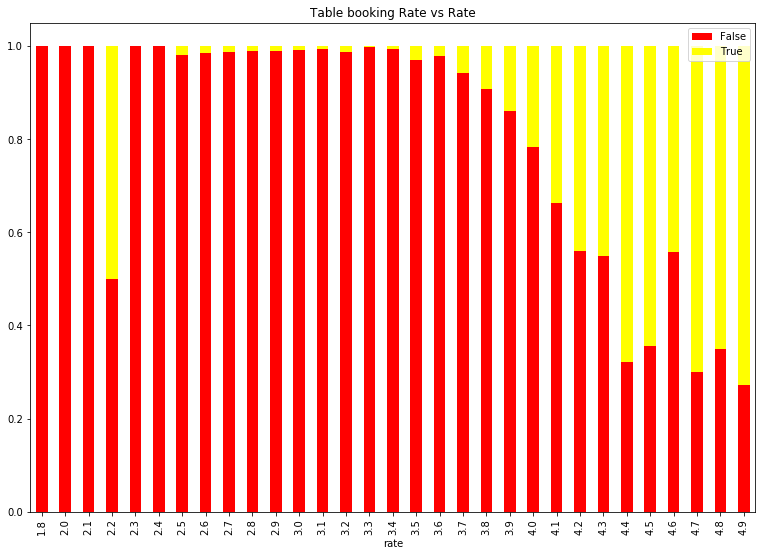

In [64]:
#Table booking Rate vs Rate


plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(zomato['rate'], zomato['book_table'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('Table booking Rate vs Rate')
plt.legend(loc='upper right')
plt.show()

Text(0.5, 1.0, 'Location')

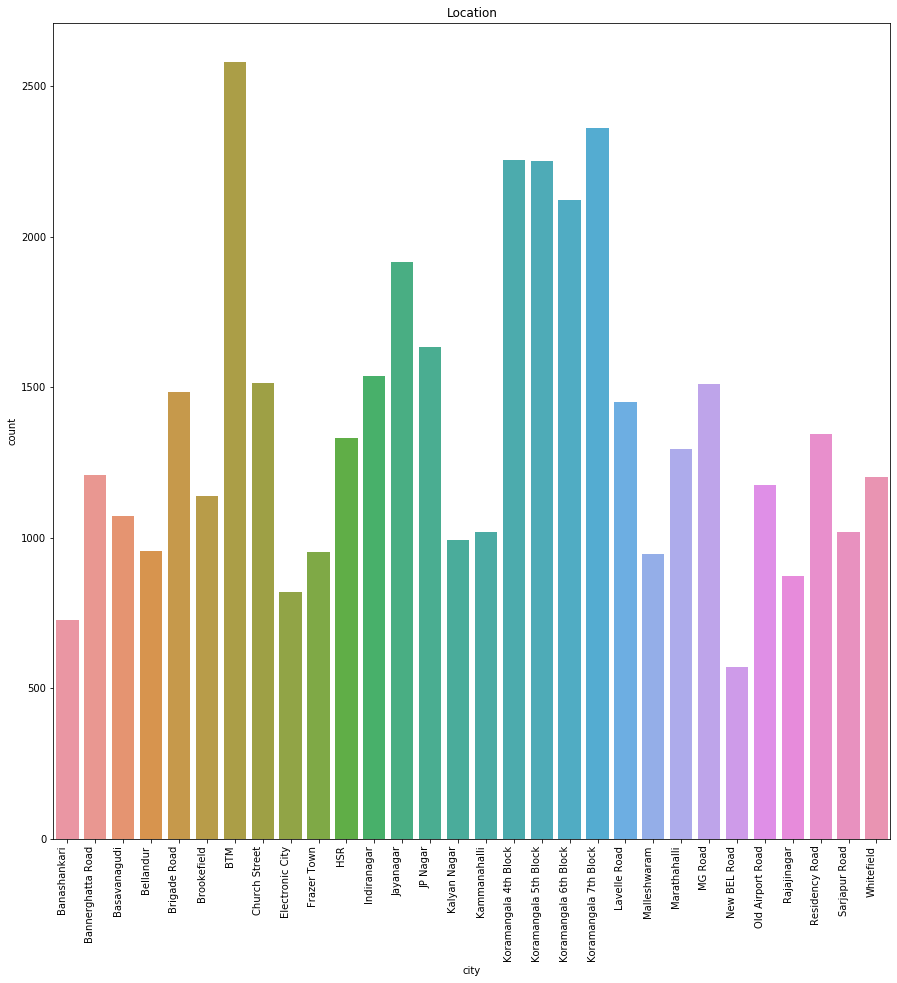

In [67]:
#location 
sns.countplot(zomato['city']).set_xticklabels(sns.countplot(zomato['city']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Location')


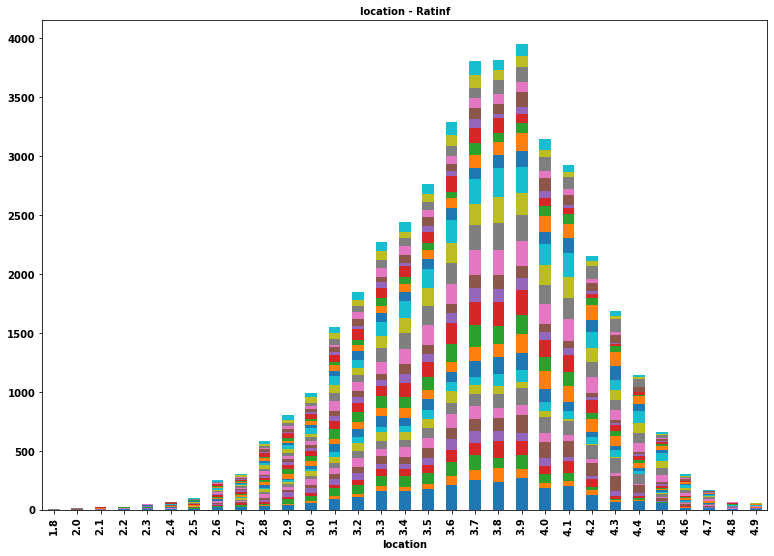

In [78]:
#Location and Rating

loc_plt = pd.crosstab(zomato['rate'],zomato['city'])
loc_plt.plot(kind='bar',stacked = True);
plt.title('location - Ratinf',fontsize=10,fontweight='bold')
plt.xlabel('rating',fontsize=10,fontweight='bold')
plt.xlabel('location',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')
plt.legend().remove()

Text(0.5, 1.0, 'Restuarant Type')

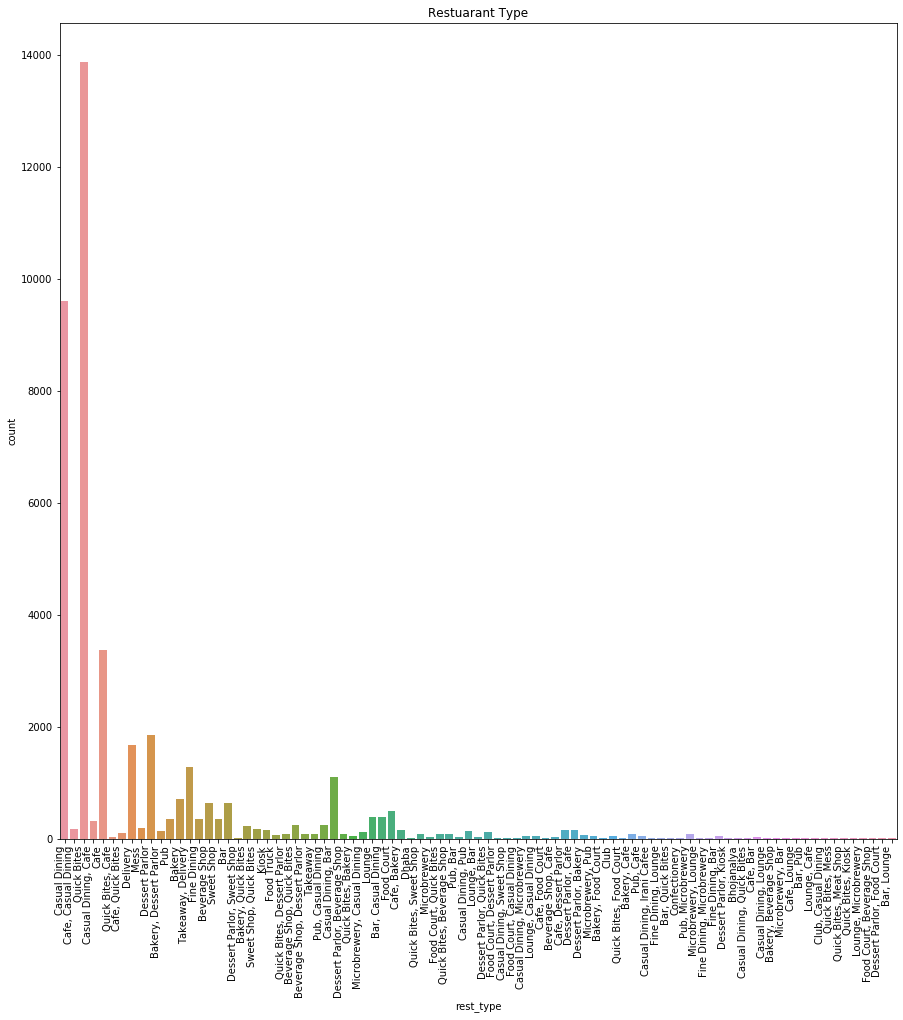

In [84]:
#Restaurant Type
sns.countplot(zomato['rest_type'])
sns.countplot(zomato['rest_type']).set_xticklabels(sns.countplot(zomato['rest_type']).get_xticklabels(),
                                                   rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Restuarant Type')